In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']

plt.rcParams['axes.unicode_minus']=False

In [132]:
df = pd.read_csv('happiness_train_complete.csv',encoding='GB18030')
df.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


In [133]:
df_predict = pd.read_csv('happiness_test_complete.csv',encoding='GB18030')
df_predict.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,8001,1,2,2,9,2015/7/24 10:30,2,1972,8,0,1,4,NaN,2.0,1989.0,18000,1,NaN,100.0,0,1,1,0,0,0,0,0,0,NaN,155,120,4,4,4,4,1,2,2,1,4,3,2,1,4,2,4,4,3,3,3,3,5,1,3,3,3,2,1.0,3.0,1,2,5,5,5,4,1,5.0,12.0,2.0,3.0,1,1,2,2,-2,5,3,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,1998.0,1972.0,1998.0,4.0,1.0,1.0,18000.0,1.0,5.0,2.0,1935,3,1,13,1936,3,1,13,3,1,4,2,30000.0,4,4,4,4,4,4,3,4,3,3,-8,3,2,4,80,80.0,60,80,80,80,80,80,80
1,8002,1,22,66,106,2015/7/12 15:38,2,1938,1,1,1,4,NaN,4.0,-2.0,20000,1,NaN,50.0,0,1,0,1,0,0,0,0,0,NaN,150,75,1,1,2,5,1,1,1,3,5,1,1,1,5,5,5,5,2,1,4,5,5,5,5,5,4,1,1.0,1.0,1,3,3,5,-8,4,5,NaN,NaN,NaN,NaN,1,1,2,2,20000,1,1,2,2,0,1,0,0,0,0,0,0,0,NaN,3,0,0.0,7,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,-2,1,1,2,3,3,4,2,50000.0,3,3,3,3,4,2,2,4,4,4,4,4,4,5,90,80.0,80,80,80,80,70,80,80
2,8003,2,9,22,44,2015/7/5 9:36,2,1935,1,1,1,1,NaN,NaN,NaN,500,1,NaN,60.0,0,0,0,1,0,0,0,0,0,NaN,155,85,4,2,2,1,1,1,1,1,1,1,1,5,5,4,5,5,4,5,5,5,5,5,5,2,3,1,2.0,6.0,1,4,1,1,1,2,4,NaN,NaN,NaN,NaN,1,1,2,2,-2,1,2,1,2,0,1,0,0,0,0,0,0,0,NaN,2,3,0.0,7,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,1914,1,1,2,3,1,3,4,2000.0,5,5,4,4,4,3,3,3,4,4,4,2,2,5,95,95.0,80,90,80,95,95,80,90
3,8004,2,18,52,86,2015/7/19 10:10,2,1992,1,1,1,4,NaN,2.0,-1.0,50000,1,NaN,220.0,0,0,1,0,0,0,0,0,0,NaN,160,126,5,5,5,1,1,2,2,1,5,4,1,1,5,4,4,5,3,4,4,3,3,3,3,2,2,2,1.0,1.0,1,4,5,4,6,5,5,NaN,NaN,NaN,NaN,2,2,2,2,100000,2,4,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,2014.0,1991.0,2014.0,4.0,1.0,1.0,50000.0,1.0,3.0,1.0,1967,4,1,2,1966,1,1,2,2,1,3,2,80000.0,4,4,3,3,4,3,3,3,3,3,3,3,3,4,80,80.0,70,90,80,80,70,60,50
4,8005,2,24,70,110,2015/8/3 11:41,1,1990,1,1,2,1,NaN,NaN,NaN,0,1,NaN,200.0,1,0,0,0,0,0,0,0,0,NaN,173,130,4,5,3,4,1,1,1,1,4,4,1,2,3,4,4,5,4,2,5,3,5,5,1,4,4,2,1.0,4.0,6,2,2,4,6,1,2,NaN,NaN,NaN,NaN,1,1,2,2,30000,3,2,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,3,1,2,-2,-8,-8,-8,2,2,5,2,-2.0,4,3,4,4,5,4,3,-8,4,3,4,5,1,-8,60,50.0,0,30,40,50,60,-2,60


In [134]:
y=df.happiness
y.value_counts()

 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: happiness, dtype: int64

In [135]:
objectList = []
numericalList = []
for i in df.columns:
    if df[i].dtype=='O':
        objectList.append(i)
    else:
        numericalList.append(i)
null_info = pd.DataFrame(df.isnull().sum())
null_info=null_info[null_info[0]!=0]
miss_number = [i for i in null_info.index if i in numericalList]
miss_object = [i for i in null_info.index if i in objectList]

In [136]:
df[miss_object]=df[miss_object].fillna(0)
null_info

,0
edu_other,7997
edu_status,1120
edu_yr,1972
join_party,7176
property_other,7934
hukou_loc,4
social_neighbor,796
social_friend,796
work_status,5049
work_yr,5049


In [137]:
df['edu_status']=df['edu_status'].replace(-8,0).fillna(0)
df['hukou_loc']=df['hukou_loc'].fillna(4)
df['work_status']=df['work_status'].replace(-8,0).fillna(9)
df['social_neighbor']=df['social_neighbor'].replace(-8,0).fillna(7)
df['social_friend']=df['social_friend'].replace(-8,0).fillna(7)
df['work_yr'][df['work_yr']<=0]=0
df['work_yr']=df['work_yr'].fillna(0)
df['work_type']=df['work_type'].replace(-8,0).fillna(0)
df['work_manage']=df['work_manage'].replace(-8,0).fillna(0)
df['family_income'][df['family_income']<=0]=0
df['family_income']=df['family_income'].fillna(0)
df['minor_child']=df['minor_child'].replace(-8,0).fillna(0)
df['s_edu']=df['s_edu'].replace(-8,14).fillna(14)
df['s_political']=df['s_political'].replace(-8,1).fillna(1)
df['s_hukou']=df['s_hukou'].replace(-8,8).fillna(8)
df['s_income'][df['s_income']<=0]=0
df['s_income']=df['s_income'].fillna(0)
df['s_work_exper']=df['s_work_exper'].fillna(6)
df['s_work_status']=df['s_work_status'].replace(-8,9).fillna(9)
df['s_work_type']=df['s_work_type'].replace(-8,0).fillna(0)


/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [138]:
null_info = pd.DataFrame(df.isnull().sum())
null_info=null_info[null_info[0]!=0]
df[null_info.index].describe()
for i in null_info.index:
    df[i][df[i]<=0]=np.nan
    df[i]=df[i].fillna(df[i].mean())
# edu_yr,join_party,marital_1st,s_birth,marital_now

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yanshuo/opt/anaconda3/lib/python3.7/

In [139]:
df[null_info.index].describe()

,edu_yr,join_party,marital_1st,s_birth,marital_now
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1988.062395,1987.937838,1985.982709,1963.963069,1988.142979
std,13.223862,5.210594,14.376173,12.851695,12.897915
min,1935.000000,1946.000000,1935.000000,1907.000000,1934.000000
25%,1983.750000,1987.937838,1978.000000,1956.000000,1982.000000
50%,1988.062395,1987.937838,1985.982709,1963.963069,1988.142979
75%,1993.000000,1987.937838,1995.000000,1972.000000,1995.000000
max,2015.000000,2015.000000,2015.000000,2004.000000,2015.000000


In [140]:
pd.set_option('display.max_columns',None)
df.describe()

,id,happiness,survey_type,province,city,county,gender,birth,nationality,religion,religion_freq,edu,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1964.707625,1.37350,0.772250,1.427250,4.878375,3.039750,1988.062395,3.330734e+04,1.317750,1987.937838,115.302954,0.007875,0.473000,0.268500,0.101125,0.102750,0.023625,0.004000,0.022500,0.13600,163.989750,121.575625,3.598500,3.786250,3.819375,1.893750,1.377250,1.891875,1.710125,1.797375,3.915375,2.368625,1.60575,1.625250,4.496500,3.452375,3.762125,4.402625,3.756250,3.554000,3.591500,3.521500,4.713500,4.482125,3.427375,2.790625,3.291000,1.92650,3.835000,4.001500,1.825500,3.135125,4.192250,3.439625,4.445125,2.925375,2.979750,6.869000,5.381750,0.402500,1.037375,1.062125,1.232875,1.820875,1.835625,6.775222e+04,2.882500,2.595875,1.063625,1.817125,0.014875,0.909500,0.06150,0.020750,0.004750,0.001875,0.0,0.000750,0.000750,0.924375,0.767125,0.406000,3.234375,1985.982709,1963.963069,1988.142979,6.726250,1.269625,3.190875,2.227414e+04,3.517375,7.196375,0.352000,1108.42025,2.043500,1.079125,2.744625,1150.667250,1.550500,0.89900

In [141]:
# df.drop(['edu_other', 'property_other', 'invest_other'],axis=1,inplace=True)
#  nationality,religion,religion_freq,edu
df.drop(['id'],axis=1,inplace=True)


In [149]:
df['nationality']=df['nationality'].replace(-8,8)
df['religion']=df['religion'].replace(-8,0)
df['religion_freq']=df['religion_freq'].replace(-8,1)
df['edu']=df['edu'].replace(-8,14)
df['income'][df['income']<=0]=0
df['political'][df['political']<=0]=0
df['depression'][df['depression']<=0]=0
for i in ['media_1','media_2','media_3','media_4','media_5','media_6','socialize', 'relax', 'learn','socia_outing']:
    df[i][df[i]<=0]=1
for i in ['leisure_1', 'leisure_2', 'leisure_3', 'leisure_4', 'leisure_5', 'leisure_6', 'leisure_7', 'leisure_8', 'leisure_9', 'leisure_10', 'leisure_11', 'leisure_12']:
    df[i][df[i]<=0]=5
df[df[number_list]<0]=0
number_list = df.select_dtypes(exclude=['object']).columns

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/yanshuo/opt/anaconda3/lib/python

TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value

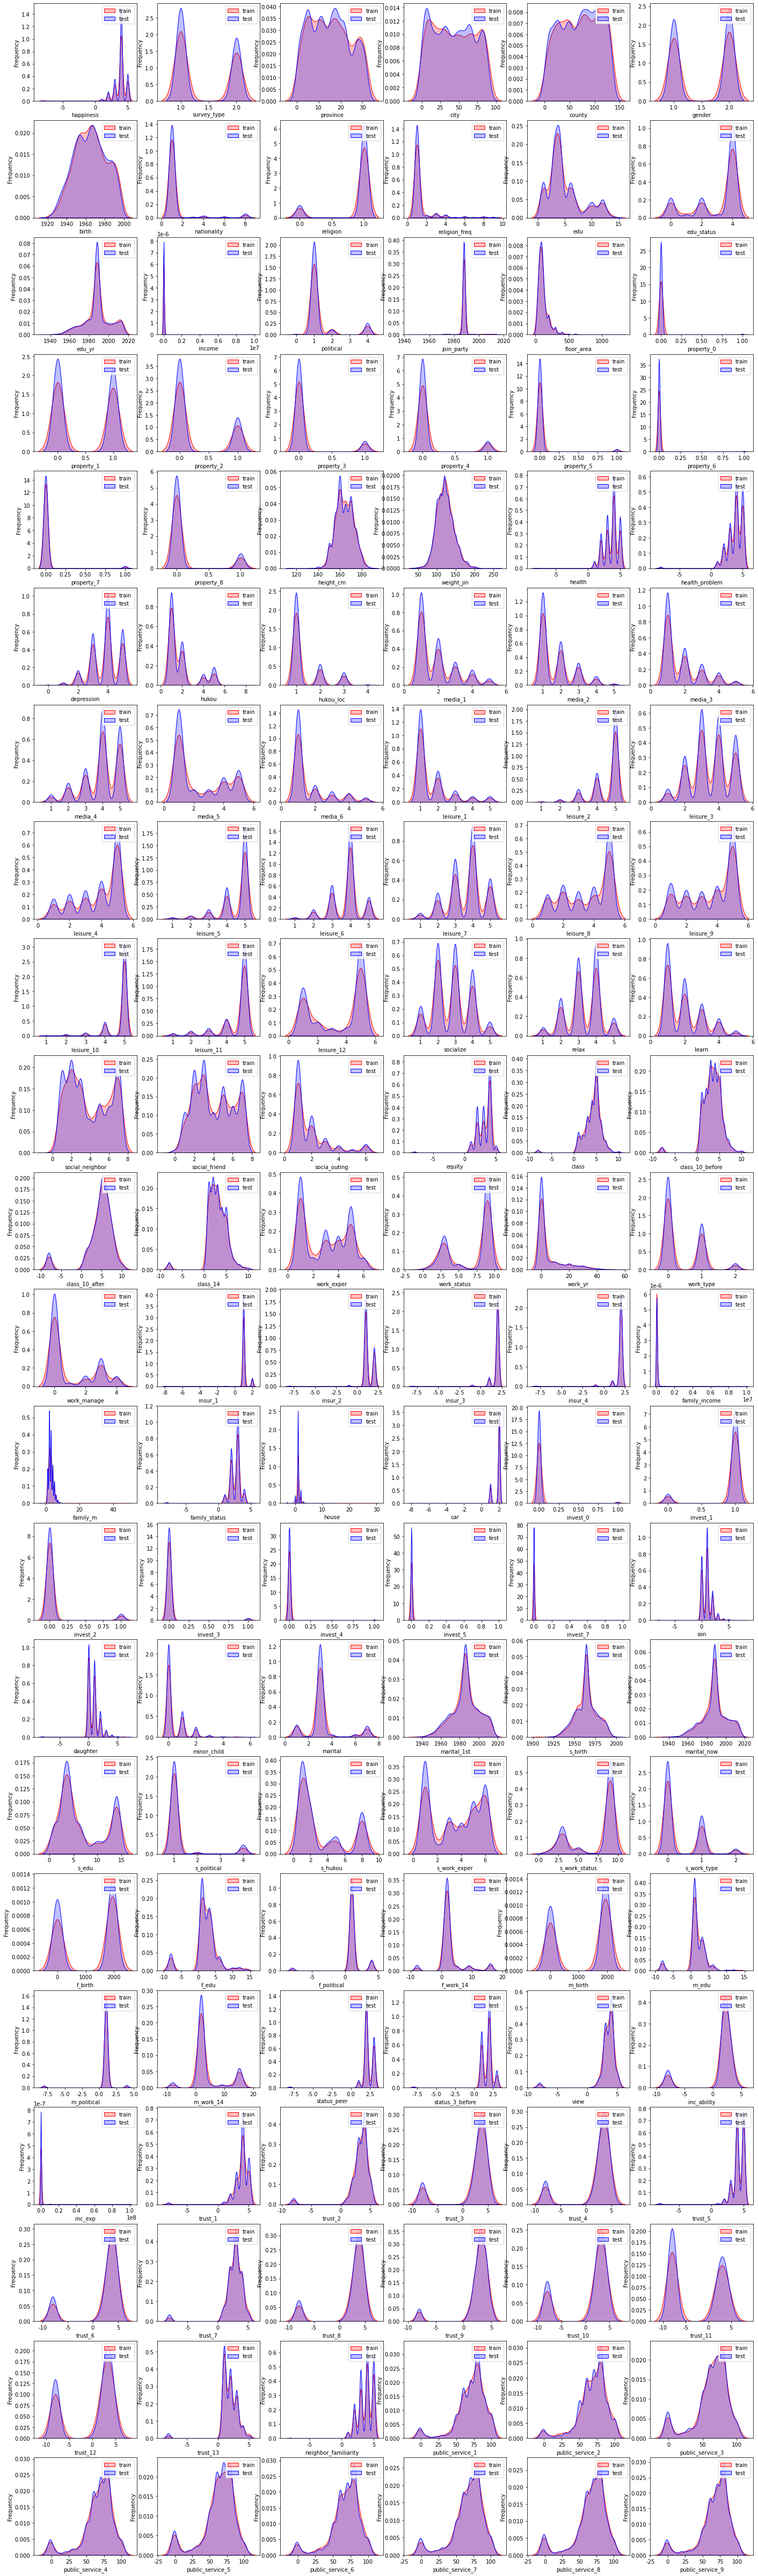

In [160]:
dist_cols=6
dist_rows=len(number_list)
plt.figure(figsize=(4*6,4*dist_rows))
i = 1
for col in number_list:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax=sns.kdeplot(df[:1600][col],color='Red',shade=True)
    ax=sns.kdeplot(df[1600:][col],color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax=ax.legend(["train","test"])
    i+=1
plt.show()

In [162]:
# df.drop(['invest_6','invest_8','s_income'],axis=1,inplace=True)
df.drop(['property_0','property_6','property_7','income','family_income','invest_4','invest_3','invest_5','invest_7','inc_exp'],axis=1,inplace=True)
number_list = df.select_dtypes(exclude=['object']).columns

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored

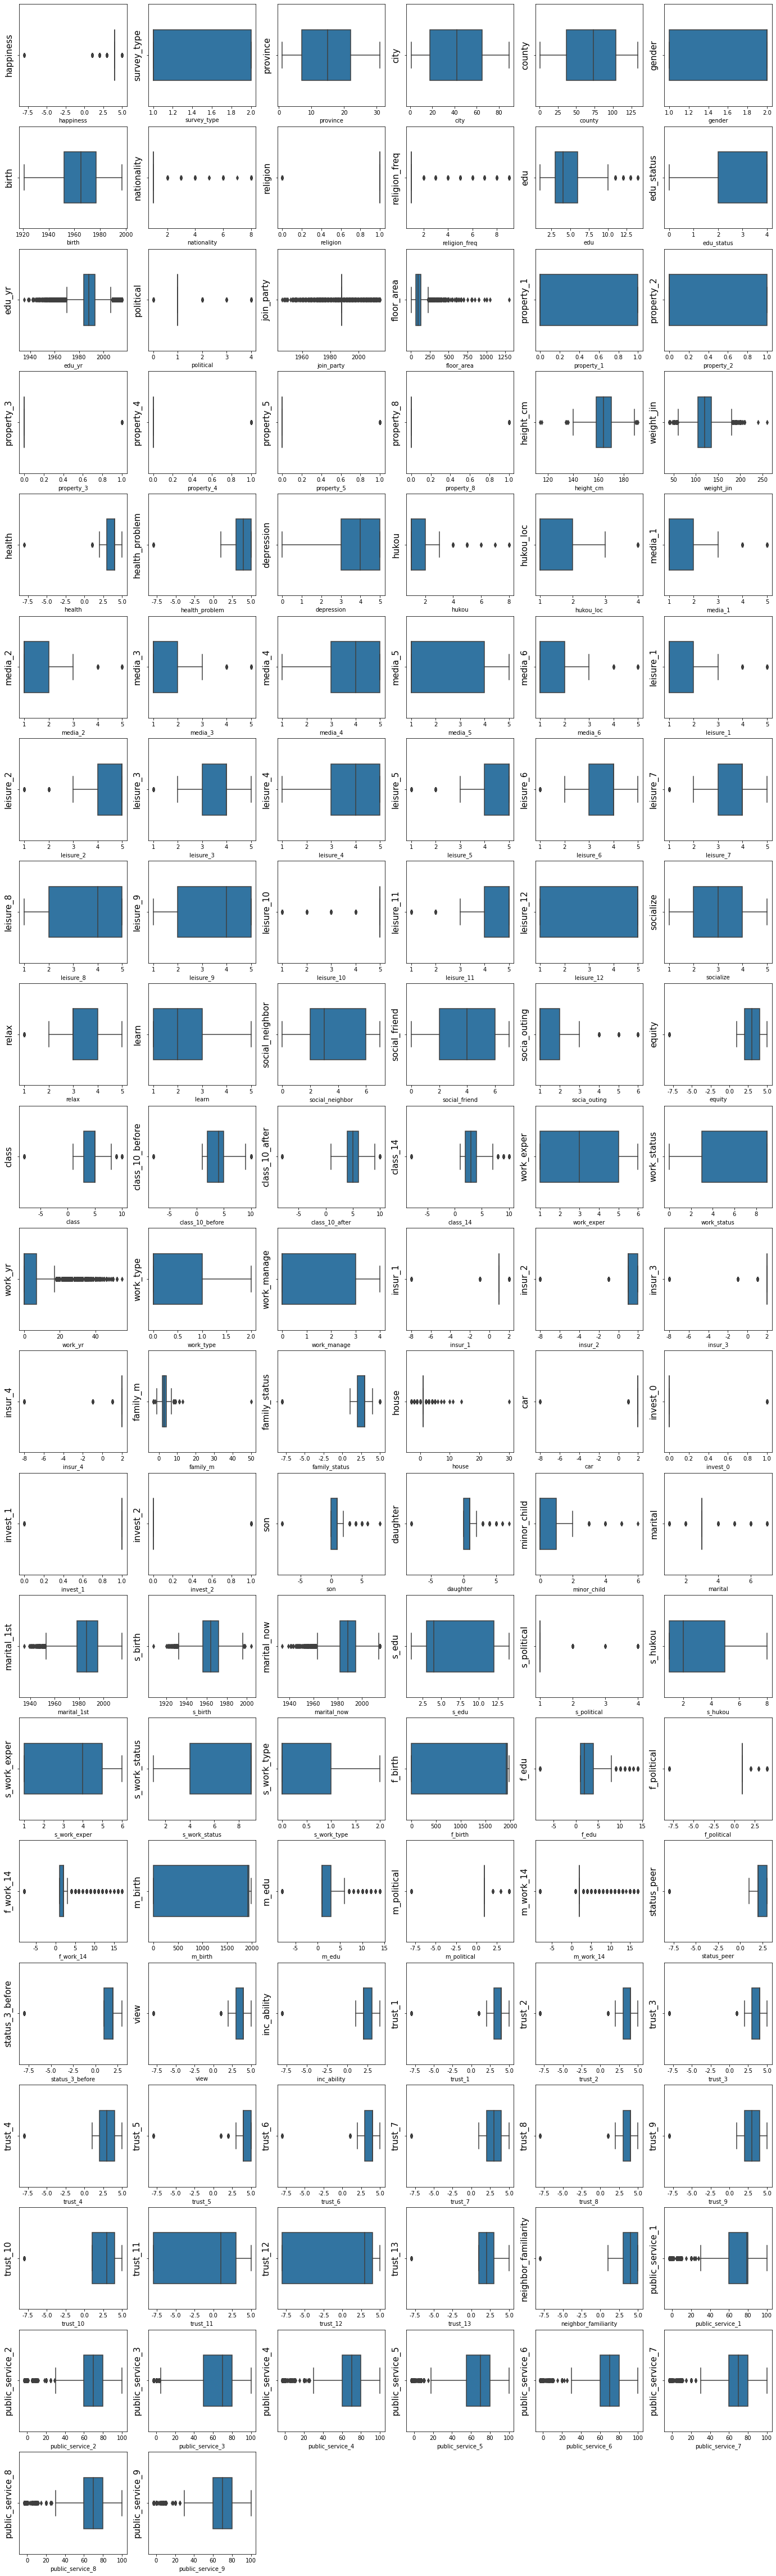

In [163]:
i = 1
plt.figure(figsize=(4*6,4*dist_rows))
for col in number_list:
    plt.subplot(dist_rows,dist_cols,i)
    sns.boxplot(df[col],orient='v',width=0.5)
    plt.ylabel(col,fontsize=15)
    i=i+1
plt.show()

In [168]:
class_list =['nationality', 'religion', 'religion_freq','political','property_3','property_4', 'property_5', 
 'property_8','leisure_10','insur_1','insur_3','insur_4','car','invest_0','invest_1','invest_2',
 'marital','s_political','f_political','m_political', 'm_work_14']
from scipy.stats import kstest
number_list_new = [i for i in number_list if i not in class_list]
for i in number_list_new:
    print(i,kstest(df[i],'norm',(df[i].mean(),df[i].std())))


happiness KstestResult(statistic=0.3419580610459031, pvalue=0.0)
survey_type KstestResult(statistic=0.390050649799468, pvalue=0.0)
province KstestResult(statistic=0.08447410115458306, pvalue=4.1099817223596297e-50)
city KstestResult(statistic=0.08025378125677851, pvalue=2.8864454219276376e-45)
county KstestResult(statistic=0.07126485545289896, pvalue=8.935715076042703e-36)
gender KstestResult(statistic=0.35681092559452354, pvalue=0.0)
birth KstestResult(statistic=0.04231549303340304, pvalue=6.946915502484222e-13)
edu KstestResult(statistic=0.26873114722855096, pvalue=0.0)
edu_status KstestResult(statistic=0.40576265314555376, pvalue=0.0)
edu_yr KstestResult(statistic=0.206492642616795, pvalue=1.2247058435925734e-299)
join_party KstestResult(statistic=0.45450000001366575, pvalue=0.0)
floor_area KstestResult(statistic=0.20316493632816035, pvalue=5.548774508442464e-290)
property_1 KstestResult(statistic=0.35526291286970013, pvalue=0.0)
property_2 KstestResult(statistic=0.45918018273822114

In [171]:
norm_list =['survey_type','city','county','birth','edu_yr','floor_area','height_cm',
            'weight_jin','leisure_3','socialize','social_neighbor','social_friend','class',
            'class_10_before','class_10_after','class_14','family_m','marital_1st','s_birth',
            'marital_now','neighbor_familiarity','public_service_1','public_service_2','public_service_3',
            'public_service_4','public_service_5','public_service_6','public_service_7',
            'public_service_8','public_service_9']

In [172]:
percentile=pd.DataFrame()
percentile['columns']=number_list_new
dropList=[]
count =0
from tqdm import tqdm
for i in tqdm(number_list_new):
    count += 1
    deg = df[i]
    mean=np.mean(deg)
    var = np.var(deg)
    percentile = np.percentile(deg,(25,50,75),interpolation='midpoint')
    Q1=percentile[0]
    Q3=percentile[2]
    IQR=Q1-Q3
    ulim=Q3+1.5*IQR
    llim=Q1-1.5*IQR
    new_deg=[]
    for i in range(len(deg)):
        if(llim<deg[i] and deg[i]<ulim):
            new_deg.append(deg[i])
    droppre=((len(deg)-len(new_deg))/len(deg))*100
    dropList.append(droppre)
    

100%|██████████| 101/101 [00:03<00:00, 26.96it/s]


In [178]:
dropList = [('%.4f' % i) for i in dropList]
percentile = pd.DataFrame([number_list_new,dropList]).T
percentile[1]=percentile[1].map(lambda x:-1 if str(x)=='nan' else float(x))
judeglist = list(percentile[percentile[1]<=10][0])
judeglist

[]

In [182]:
import lightgbm as lgb

import catboost as cbt

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as std

In [183]:
df_1=df.copy()

In [192]:
df.happiness=df.happiness.replace(-8,3)

In [187]:
not_norm = [i for i in number_list_new if i not in norm_list]
drop_index=[]
stdsc=StandardScaler()
for i in tqdm(not_norm):
    new_i ='zheng_' + i 
    df_1[new_i]=stdsc.fit_transform(df_1[i].values.reshape(-1,1))
    std=np.std(df_1[new_i])
    mean = np.std(df_1[new_i])
    Q3_outliners = std*3
    l_lim = mean - Q3_outliners
    u_lim = mean + Q3_outliners
    df_1 = df_1.drop(df_1[df_1[new_i]>u_lim].index)
    df_1 = df_1.drop(df_1[df_1[new_i]<l_lim].index)


100%|██████████| 71/71 [00:00<00:00, 77.25it/s]


In [199]:
from sklearn.model_selection import train_test_split
train_label= df.happiness
train_data = df.drop(['happiness','survey_time', 'edu_other', 'property_other', 'invest_other'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=2021)
from xgboost import XGBClassifier

In [215]:
clf= XGBClassifier(
    iterations=2000,
    od_type='Iter',
    od_wait=120,
    max_depth=8,
    learning_rate=0.02,
    l2_leaf_reg=9,
    random_seed=2019,
    metric_period=50,
    fold_len_multiplier=1.1,
    loss_function='MultiClass',
    logging_level='Verbose')
    
clf.fit(x_train, y_train)

XGBClassifier(fold_len_multiplier=1.1, iterations=2000, l2_leaf_reg=9,
              learning_rate=0.02, logging_level='Verbose',
              loss_function='MultiClass', max_depth=8, metric_period=50,
              objective='multi:softprob', od_type='Iter', od_wait=120,
              random_seed=2019)

In [209]:
pred = clf.predict(x_test)
from sklearn import metrics
confusion_matrix_result = metrics.confusion_matrix(pred,y_test)


In [216]:
from sklearn.metrics import f1_score, accuracy_score
f1_score(y_test, pred, average='macro')

0.3148916729712189